# Logistic Regression Classifier

Is used to identify the relationship between the independent variables and the dependent variables by estimating the probabilities using a logistic function. This logistic function is a __sigmoid curve__ that is used to build the function with various parameters.

In [13]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

In [10]:
def visualize_classifier(classifier, X, y):
    # Define the maximum and minimum values for x and y that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), 
                                 np.arange(min_y, max_y, mesh_step_size))
    
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    
    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Sepcify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()

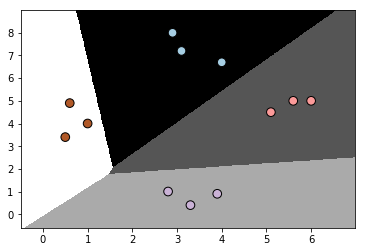

In [17]:
# Define sample input data
X = np.array([[3.1, 7.2],
              [4, 6.7],
              [2.9, 8],
              [5.1, 4.5],
              [6, 5],
              [5.6, 5],
              [3.3, .4],
              [3.9, 0.9],
              [2.8, 1],
              [0.5, 3.4],
              [1, 4],
              [0.6, 4.9]])

y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

# Create the logistic regression classifier
classifier = LogisticRegression(solver='liblinear', C=1)

# Train the classifier 
classifier.fit(X, y)

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

# Naive Bayes Classifier

A technique to build classifier using Bayes Theorem. Bayes Theorem describes the probability of an event occuring based on different conditions that are related to this event.


accuracy of the naive bayes classifier = 100.0%


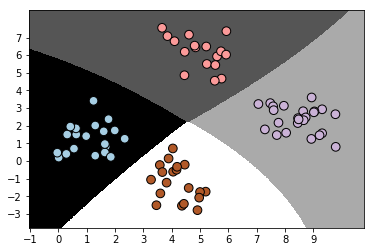

In [17]:
# Input file containing data
input_file = 'data_multivar_nb.txt'

# Load data from input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Create naive bayes classifier
classifier = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Train the classifier
# classifier.fit(X, y)
classifier.fit(X_train, y_train)

# Predict the values for training data
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = 100 * (y_test == y_pred).sum() / X_test.shape[0]
print('accuracy of the naive bayes classifier = {}%'.format(round(accuracy, 2)))

# Visualize the performance of the classifier
visualize_classifier(classifier, X_test, y_test)